To simulate an M/N/1 queue in Python, we need to break down the components of the queue:

M refers to a Poisson arrival process (exponentially distributed inter-arrival times).
N represents the maximum number of customers that can be in the system (including the ones in service).
1 means there is a single server.
We will simulate the queue using Python, where the system will have:

Inter-arrival times that are exponentially distributed (for M).
Service times that are also exponentially distributed.
Queue capacity is limited to N customers.


In [1]:
import random
import math
import heapq
import matplotlib.pyplot as plt

# Exponentially distributed random variable generation function
def exp_random(rate):
    return random.expovariate(rate)

# Event types
ARRIVAL = 0
DEPARTURE = 1

class M_N_1_Queue:
    def __init__(self, lambda_rate, mu_rate, N, max_time):
        """
        Initialize the M/N/1 queue simulation.

        lambda_rate: arrival rate (Poisson process)
        mu_rate: service rate (exponentially distributed service times)
        N: maximum capacity of the queue
        max_time: simulation time limit
        """
        self.lambda_rate = lambda_rate
        self.mu_rate = mu_rate
        self.N = N
        self.max_time = max_time
        self.current_time = 0
        self.queue = []  # Will contain customers in queue
        self.serving = None  # Currently serving customer, None if idle
        self.total_arrivals = 0
        self.total_departures = 0
        self.events = []  # Priority queue of events

        self.arrival_rate = lambda_rate
        self.service_rate = mu_rate

        # Start with the first arrival event
        self.schedule_arrival()

    def schedule_arrival(self):
        """Schedule the next arrival event."""
        arrival_time = self.current_time + exp_random(self.lambda_rate)
        heapq.heappush(self.events, (arrival_time, ARRIVAL))

    def schedule_departure(self):
        """Schedule the next departure event if the server is busy."""
        if self.serving:
            departure_time = self.current_time + exp_random(self.mu_rate)
            heapq.heappush(self.events, (departure_time, DEPARTURE))

    def process_event(self, event_time, event_type):
        """Process events (either arrival or departure)."""
        self.current_time = event_time

        if event_type == ARRIVAL:
            self.total_arrivals += 1
            if len(self.queue) < self.N:  # If there's space in the queue
                self.queue.append(self.current_time)
                if self.serving is None:  # If the server is idle
                    self.start_service()
            else:
                # If the queue is full, the customer is lost (dropped).
                print(f"Customer arrived at {self.current_time} but was dropped (queue full).")

            # Schedule next arrival
            self.schedule_arrival()

        elif event_type == DEPARTURE:
            self.total_departures += 1
            if self.queue:  # If there's a customer to serve
                self.queue.pop(0)  # Remove the customer from the queue
                self.start_service()
            else:
                self.serving = None  # Server becomes idle

            # Schedule next departure
            self.schedule_departure()

    def start_service(self):
        """Start serving the first customer in the queue."""
        if self.queue:
            self.serving = self.queue[0]
            self.schedule_departure()

    def run(self):
        """Run the simulation."""
        while self.current_time < self.max_time:
            if not self.events:
                break  # No more events to process

            # Get the next event to process
            event_time, event_type = heapq.heappop(self.events)

            # Process the event
            self.process_event(event_time, event_type)

    def stats(self):
        """Print the simulation stats."""
        print(f"Simulation ended at time {self.current_time:.2f}")
        print(f"Total arrivals: {self.total_arrivals}")
        print(f"Total departures: {self.total_departures}")
        print(f"Final queue length: {len(self.queue)}")
        print(f"Server state: {'Idle' if self.serving is None else 'Busy'}")

# Parameters for the M/N/1 queue
lambda_rate = 1.0  # Arrival rate (customers per time unit)
mu_rate = 1.5      # Service rate (customers per time unit)
N = 3              # Maximum capacity of the queue
max_time = 20      # Total simulation time

# Run the simulation
queue_simulation = M_N_1_Queue(lambda_rate, mu_rate, N, max_time)
queue_simulation.run()
queue_simulation.stats()



Simulation ended at time 20.60
Total arrivals: 16
Total departures: 28
Final queue length: 1
Server state: Busy


Simulation ended at time 21.40
Total arrivals: 23
Total departures: 41
Final queue length: 1
Server state: Busy


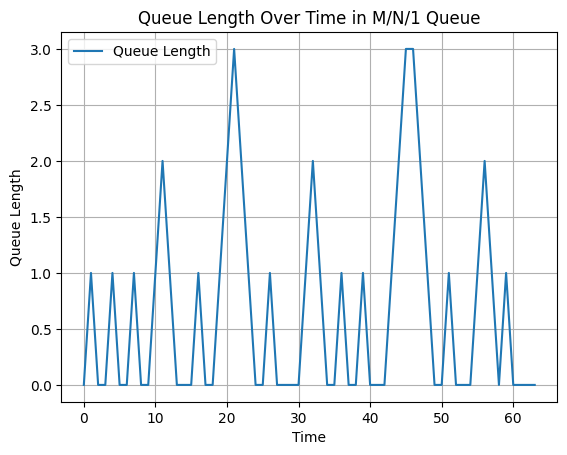

In [5]:
#with simple plot
import random
import heapq
import matplotlib.pyplot as plt

# Exponentially distributed random variable generation function
def exp_random(rate):
    return random.expovariate(rate)

# Event types
ARRIVAL = 0
DEPARTURE = 1

class M_N_1_Queue:
    def __init__(self, lambda_rate, mu_rate, N, max_time):
        """
        Initialize the M/N/1 queue simulation.

        lambda_rate: arrival rate (Poisson process)
        mu_rate: service rate (exponentially distributed service times)
        N: maximum capacity of the queue
        max_time: simulation time limit
        """
        self.lambda_rate = lambda_rate
        self.mu_rate = mu_rate
        self.N = N
        self.max_time = max_time
        self.current_time = 0
        self.queue = []  # Will contain customers in queue
        self.serving = None  # Currently serving customer, None if idle
        self.total_arrivals = 0
        self.total_departures = 0
        self.events = []  # Priority queue of events
        self.queue_lengths = []  # To track the queue length over time

        # Start with the first arrival event
        self.schedule_arrival()

    def schedule_arrival(self):
        """Schedule the next arrival event."""
        arrival_time = self.current_time + exp_random(self.lambda_rate)
        heapq.heappush(self.events, (arrival_time, ARRIVAL))

    def schedule_departure(self):
        """Schedule the next departure event if the server is busy."""
        if self.serving:
            departure_time = self.current_time + exp_random(self.mu_rate)
            heapq.heappush(self.events, (departure_time, DEPARTURE))

    def process_event(self, event_time, event_type):
        """Process events (either arrival or departure)."""
        self.current_time = event_time
        self.queue_lengths.append(len(self.queue))  # Track queue length at each event

        if event_type == ARRIVAL:
            self.total_arrivals += 1
            if len(self.queue) < self.N:  # If there's space in the queue
                self.queue.append(self.current_time)
                if self.serving is None:  # If the server is idle
                    self.start_service()
            else:
                # If the queue is full, the customer is lost (dropped).
                pass

            # Schedule next arrival
            self.schedule_arrival()

        elif event_type == DEPARTURE:
            self.total_departures += 1
            if self.queue:  # If there's a customer to serve
                self.queue.pop(0)  # Remove the customer from the queue
                self.start_service()
            else:
                self.serving = None  # Server becomes idle

            # Schedule next departure
            self.schedule_departure()

    def start_service(self):
        """Start serving the first customer in the queue."""
        if self.queue:
            self.serving = self.queue[0]
            self.schedule_departure()

    def run(self):
        """Run the simulation."""
        while self.current_time < self.max_time:
            if not self.events:
                break  # No more events to process

            # Get the next event to process
            event_time, event_type = heapq.heappop(self.events)

            # Process the event
            self.process_event(event_time, event_type)

    def stats(self):
        """Print the simulation stats."""
        print(f"Simulation ended at time {self.current_time:.2f}")
        print(f"Total arrivals: {self.total_arrivals}")
        print(f"Total departures: {self.total_departures}")
        print(f"Final queue length: {len(self.queue)}")
        print(f"Server state: {'Idle' if self.serving is None else 'Busy'}")

# Parameters for the M/N/1 queue
lambda_rate = 1.0  # Arrival rate (customers per time unit)
mu_rate = 1.5      # Service rate (customers per time unit)
N = 3              # Maximum capacity of the queue
max_time = 20      # Total simulation time

# Run the simulation
queue_simulation = M_N_1_Queue(lambda_rate, mu_rate, N, max_time)
queue_simulation.run()
queue_simulation.stats()

# Plot the queue length over time
plt.plot(queue_simulation.queue_lengths, label='Queue Length')
plt.xlabel('Time')
plt.ylabel('Queue Length')
plt.title('Queue Length Over Time in M/N/1 Queue')
plt.grid(True)
plt.legend()
plt.show()


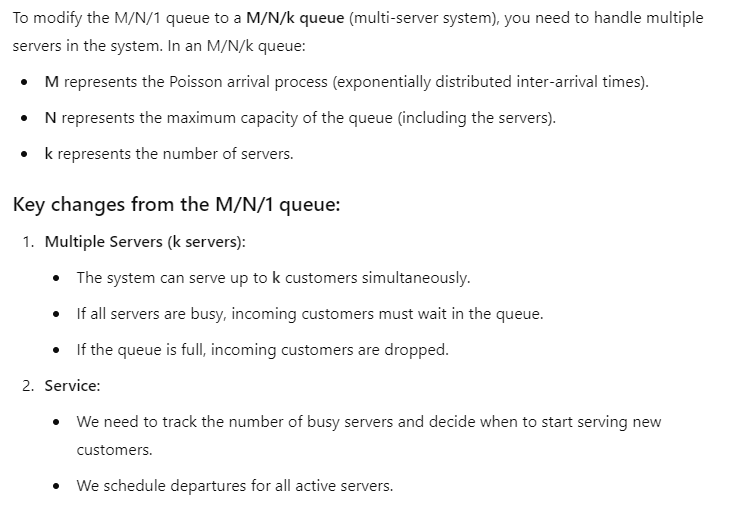

Simulation ended at time 20.03
Total arrivals: 25
Total departures: 23
Final queue length: 0
Servers' states: ['Busy', 'Busy', 'Idle']


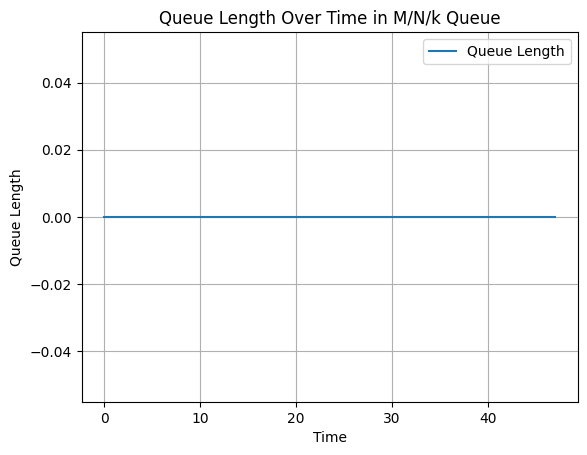

In [7]:
import random
import heapq
import matplotlib.pyplot as plt

# Exponentially distributed random variable generation function
def exp_random(rate):
    return random.expovariate(rate)

# Event types
ARRIVAL = 0
DEPARTURE = 1

class M_N_k_Queue:
    def __init__(self, lambda_rate, mu_rate, N, k, max_time):
        """
        Initialize the M/N/k queue simulation.

        lambda_rate: arrival rate (Poisson process)
        mu_rate: service rate (exponentially distributed service times)
        N: maximum capacity of the queue (including servers)
        k: number of servers
        max_time: simulation time limit
        """
        self.lambda_rate = lambda_rate
        self.mu_rate = mu_rate
        self.N = N
        self.k = k
        self.max_time = max_time
        self.current_time = 0
        self.queue = []  # Will contain customers in queue
        self.serving = [None] * k  # Track the state of each server (None = idle)
        self.total_arrivals = 0
        self.total_departures = 0
        self.events = []  # Priority queue of events
        self.queue_lengths = []  # To track the queue length over time

        # Start with the first arrival event
        self.schedule_arrival()

    def schedule_arrival(self):
        """Schedule the next arrival event."""
        arrival_time = self.current_time + exp_random(self.lambda_rate)
        heapq.heappush(self.events, (arrival_time, ARRIVAL))

    def schedule_departure(self, server_id):
        """Schedule the next departure event for a specific server."""
        departure_time = self.current_time + exp_random(self.mu_rate)
        heapq.heappush(self.events, (departure_time, DEPARTURE, server_id))

    def process_event(self, event_time, event_type, server_id=None):
        """Process events (either arrival or departure)."""
        self.current_time = event_time
        self.queue_lengths.append(len(self.queue))  # Track queue length at each event

        if event_type == ARRIVAL:
            self.total_arrivals += 1
            if len(self.queue) + sum(1 for s in self.serving if s is not None) < self.N:  # If there's space
                # Try to assign to an idle server first
                assigned = False
                for i in range(self.k):
                    if self.serving[i] is None:  # If server is idle
                        self.serving[i] = self.current_time  # Start serving this customer
                        self.schedule_departure(i)  # Schedule departure for this server
                        assigned = True
                        break

                if not assigned:
                    # All servers are busy, so the customer must wait in the queue
                    self.queue.append(self.current_time)

            else:
                # Queue is full, the customer is dropped.
                pass

            # Schedule next arrival
            self.schedule_arrival()

        elif event_type == DEPARTURE:
            self.total_departures += 1
            if self.queue:  # If there are customers waiting
                # Assign this server to the next customer in the queue
                self.queue.pop(0)  # Remove the customer from the queue
                self.serving[server_id] = self.current_time  # Start serving the next customer
                self.schedule_departure(server_id)
            else:
                self.serving[server_id] = None  # Mark the server as idle

    def run(self):
        """Run the simulation."""
        while self.current_time < self.max_time:
            if not self.events:
                break  # No more events to process

            # Get the next event to process
            event = heapq.heappop(self.events)
            if len(event) == 2:
                event_time, event_type = event
                self.process_event(event_time, event_type)
            else:
                event_time, event_type, server_id = event
                self.process_event(event_time, event_type, server_id)

    def stats(self):
        """Print the simulation stats."""
        print(f"Simulation ended at time {self.current_time:.2f}")
        print(f"Total arrivals: {self.total_arrivals}")
        print(f"Total departures: {self.total_departures}")
        print(f"Final queue length: {len(self.queue)}")
        print(f"Servers' states: {['Idle' if s is None else 'Busy' for s in self.serving]}")

# Parameters for the M/N/k queue
lambda_rate = 1.0  # Arrival rate (customers per time unit)
mu_rate = 1.5      # Service rate (customers per time unit)
N = 5              # Maximum capacity of the queue (including servers)
k = 3              # Number of servers
max_time = 20      # Total simulation time

# Run the simulation
queue_simulation = M_N_k_Queue(lambda_rate, mu_rate, N, k, max_time)
queue_simulation.run()
queue_simulation.stats()

# Plot the queue length over time
plt.plot(queue_simulation.queue_lengths, label='Queue Length')
plt.xlabel('Time')
plt.ylabel('Queue Length')
plt.title('Queue Length Over Time in M/N/k Queue')
plt.grid(True)
plt.legend()
plt.show()
